<a href="https://colab.research.google.com/github/microsoft/qlib/blob/main/examples/workflow_by_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#  Copyright (c) Microsoft Corporation.
#  Licensed under the MIT License.

In [1]:
import sys, site
from pathlib import Path

################################# NOTE #################################
#  Please be aware that if colab installs the latest numpy and pyqlib  #
#  in this cell, users should RESTART the runtime in order to run the  #
#  following cells successfully.                                       #
########################################################################

try:
    import qlib
except ImportError:
    # install qlib
    ! pip install --upgrade numpy
    ! pip install pyqlib
    if "google.colab" in sys.modules:
        # The Google colab environment is a little outdated. We have to downgrade the pyyaml to make it compatible with other packages
        ! pip install pyyaml==5.4.1
    # reload
    site.main()

scripts_dir = Path.cwd().parent.joinpath("scripts")
if not scripts_dir.joinpath("get_data.py").exists():
    # download get_data.py script
    scripts_dir = Path("~/tmp/qlib_code/scripts").expanduser().resolve()
    scripts_dir.mkdir(parents=True, exist_ok=True)
    import requests

    with requests.get("https://raw.githubusercontent.com/microsoft/qlib/main/scripts/get_data.py", timeout=10) as resp:
        with open(scripts_dir.joinpath("get_data.py"), "wb") as fp:
            fp.write(resp.content)

In [2]:
import qlib
import pandas as pd
from qlib.constant import REG_CN
from qlib.utils import exists_qlib_data, init_instance_by_config
from qlib.workflow import R
from qlib.workflow.record_temp import SignalRecord, PortAnaRecord
from qlib.utils import flatten_dict

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


In [3]:

# use default data
# NOTE: need to download data from remote: python scripts/get_data.py qlib_data_cn --target_dir ~/.qlib/qlib_data/cn_data
provider_uri = "~/.qlib/qlib_data/cn_data"  # target_dir
if not exists_qlib_data(provider_uri):
    print(f"Qlib data is not found in {provider_uri}")
    sys.path.append(str(scripts_dir))
    from get_data import GetData

    GetData().qlib_data(target_dir=provider_uri, region=REG_CN)
qlib.init(provider_uri=provider_uri, region=REG_CN)

[23456:MainThread](2025-12-19 09:29:21,009) INFO - qlib.Initialization - [config.py:452] - default_conf: client.
[23456:MainThread](2025-12-19 09:29:21,009) INFO - qlib.Initialization - [__init__.py:82] - qlib successfully initialized based on client settings.
[23456:MainThread](2025-12-19 09:29:21,009) INFO - qlib.Initialization - [__init__.py:84] - data_path={'__DEFAULT_FREQ': WindowsPath('C:/Users/Yongj/.qlib/qlib_data/cn_data')}


In [10]:
from qlib.data import D

valid_fields = []

candidate_fields = [
    "$open",
    "$high",
    "$low",
    "$close",
    "$volume",
    "$factor",
    "$amount",
]


for f in candidate_fields:
    try:
        _ = D.features(
            instruments=["SH600519"],
            fields=[f],
            freq="day"
        )
        valid_fields.append(f)
    except Exception as e:
        print(f"{f} 不可用")

valid_fields


['$open', '$high', '$low', '$close', '$volume', '$factor', '$amount']

In [11]:
# ====== 2. 读取示例标的数据 ======
from qlib.data import D
import pandas as pd

symbol = "SH600519"  # 贵州茅台
fields = ['$open', '$high', '$low', '$close', '$volume']

df = D.features(
    instruments=[symbol],
    fields=fields,
    freq="day"
)

df.tail()

$open       $high        $low      $close  \
instrument datetime                                                     
SH600519   2025-12-11  197.097275  197.844101  196.381287  197.844101   
           2025-12-12  198.686218  199.667038  198.065506  199.057541   
           2025-12-15  201.711349  201.767395  199.746902  199.807159   
           2025-12-16  199.835159  200.196655  198.265854  199.246674   
           2025-12-17  199.666977  201.760330  198.641312  200.801926   

                             $volume  
instrument datetime                   
SH600519   2025-12-11  159759.171875  
           2025-12-12  265200.718750  
           2025-12-15  238077.734375  
           2025-12-16  171025.890625  
           2025-12-17  223973.187500

In [13]:
!pip3 install akshare

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ----------------------------- ---------- 0.8/1.1 MB 6.7 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 7.4 MB/s eta 0:00:00
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/0a/0d/b10ac09069973d112de6ef980c1f6bb31cb7dcd0bc363acbdad58f927873/aiohttp-3.13.2-cp312-cp312-win_amd64.whl (453 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/c0/da/977ded879c29cbd04de313843e76868e6e13408a94ed6b987245dc7c8506/openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     --------------------------------


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import akshare as ak

sh = ak.stock_info_sh_name_code()
sz = ak.stock_info_sz_name_code()
bj = ak.stock_info_bj_name_code()



In [18]:
sh

,证券代码,证券简称,公司全称,上市日期
0,600000,浦发银行,上海浦东发展银行股份有限公司,1999-11-10
1,600004,白云机场,广州白云国际机场股份有限公司,2003-04-28
2,600006,东风股份,东风汽车股份有限公司,1999-07-27
3,600007,中国国贸,中国国际贸易中心股份有限公司,1999-03-12
4,600008,首创环保,北京首创生态环保集团股份有限公司,2000-04-27
...,...,...,...,...
1694,605580,恒盛能源,恒盛能源股份有限公司,2021-08-19
1695,605588,冠石科技,南京冠石科技股份有限公司,2021-08-12
1696,605589,圣泉集团,济南圣泉集团股份有限公司,2021-08-10
1697,605598,上海港湾,上海港湾基础建设(集团)股份有限公司,2021-09-17


In [20]:
sh["exchange"] = "SH"
sz["exchange"] = "SZ"
bj["exchange"] = "BJ"

basic = pd.concat([sh, sz, bj])
basic["qlib_code"] = basic["exchange"] + basic["证券代码"]

In [21]:
basic

,证券代码,证券简称,公司全称,上市日期,exchange,板块,A股代码,A股简称,A股上市日期,A股总股本,A股流通股本,所属行业,总股本,流通股本,地区,报告日期,qlib_code
0,600000,浦发银行,上海浦东发展银行股份有限公司,1999-11-10,SH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SH600000
1,600004,白云机场,广州白云国际机场股份有限公司,2003-04-28,SH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SH600004
2,600006,东风股份,东风汽车股份有限公司,1999-07-27,SH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SH600006
3,600007,中国国贸,中国国际贸易中心股份有限公司,1999-03-12,SH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SH600007
4,600008,首创环保,北京首创生态环保集团股份有限公司,2000-04-27,SH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SH600008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,920978,开特股份,NaN,2023-09-28,BJ,NaN,NaN,NaN,NaN,NaN,NaN,汽车制造业,180028468.0,100934948.0,湖北省,2025-12-18,BJ920978
282,920981,晶赛科技,NaN,2021-11-15,BJ,NaN,NaN,NaN,NaN,NaN,NaN,计算机、通信和其他电子设备制造业,76468000.0,37309618.0,安徽省,2025-12-18,BJ920981
283,920982,锦波生物,NaN,2023-07-20,BJ,NaN,NaN,NaN,NaN,NaN,NaN,医药制造业,115065340.0,54905088.0,山西省,2025-12-18,BJ920982
284,920985,海泰新能,NaN,2022-08-08,BJ,NaN,NaN,NaN,NaN,NaN,NaN,电气机械和器材制造业,309476200.0,219317859.0,河北省,2025-12-18,BJ920985


In [ ]:
def ak_to_qlib(code):
    return ("SH" if code.startswith("6") else "SZ") + code

pe["instrument"] = pe["symbol"].apply(ak_to_qlib)


IndexError: index -1 is out of bounds for axis 0 with size 0

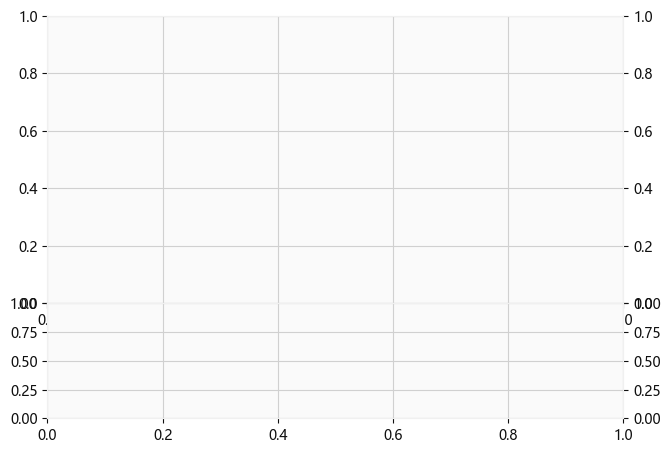

In [7]:


# ====== 4. 回测前绘制 K 线图 ======
# 需要：pip install mplfinance

import mplfinance as mpf

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Microsoft YaHei', 'SimHei', 'SimSun', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 创建基于 Yahoo 风格的自定义样式，添加中文支持
yahoo_chinese_style = mpf.make_mpf_style(
    base_mpf_style='yahoo',  # 使用 Yahoo 风格作为基础（红绿K线）
    rc={
        'font.family': ['Microsoft YaHei', 'SimHei'],  # 添加中文支持
        'axes.unicode_minus': False  # 解决负号显示问题
    }
)

df_k = df.reset_index(level=0, drop=True)
df_k.columns = ["open", "high", "low", "close", "volume"]
df_k = df_k.sort_index()

mpf.plot(
    df_k.loc["2024":"2025"],
    type="candle",
    volume=True,
    title=f"{symbol} K线图 (2024-2025)",
    style=yahoo_chinese_style
)

In [8]:
market = "csi300"
benchmark = "SH000300"

# train model

In [9]:
###################################
# train model
###################################
data_handler_config = {
    "start_time": "2008-01-01",
    "end_time": "2025-12-15",
    "fit_start_time": "2008-01-01",
    "fit_end_time": "2024-12-31",
    "instruments": market,
}

task = {
    "model": {
        "class": "LGBModel",
        "module_path": "qlib.contrib.model.gbdt",
        "kwargs": {
            "loss": "mse",
            "colsample_bytree": 0.8879,
            "learning_rate": 0.0421,
            "subsample": 0.8789,
            "lambda_l1": 205.6999,
            "lambda_l2": 580.9768,
            "max_depth": 8,
            "num_leaves": 210,
            "num_threads": 20,
        },
    },
    "dataset": {
        "class": "DatasetH",
        "module_path": "qlib.data.dataset",
        "kwargs": {
            "handler": {
                "class": "Alpha158",
                "module_path": "qlib.contrib.data.handler",
                "kwargs": data_handler_config,
            },
            "segments": {
                "train": ("2008-01-01", "2023-12-31"),
                "valid": ("2024-01-01", "2024-12-31"),
                "test": ("2025-01-01", "2025-12-15"),
            },
        },
    },
}

# model initialization
model = init_instance_by_config(task["model"])
dataset = init_instance_by_config(task["dataset"])

# start exp to train model
with R.start(experiment_name="train_model"):
    R.log_params(**flatten_dict(task))
    model.fit(dataset)
    R.save_objects(trained_model=model)
    rid = R.get_recorder().id

ModuleNotFoundError. CatBoostModel are skipped. (optional: maybe installing CatBoostModel can fix it.)
ModuleNotFoundError. XGBModel is skipped(optional: maybe installing xgboost can fix it).
ModuleNotFoundError.  PyTorch models are skipped (optional: maybe installing pytorch can fix it).


[29248:MainThread](2025-12-17 16:31:01,404) INFO - qlib.timer - [log.py:127] - Time cost: 74.459s | Loading data Done
[29248:MainThread](2025-12-17 16:31:02,876) INFO - qlib.timer - [log.py:127] - Time cost: 0.276s | DropnaLabel Done
[29248:MainThread](2025-12-17 16:31:04,597) INFO - qlib.timer - [log.py:127] - Time cost: 1.721s | CSZScoreNorm Done
[29248:MainThread](2025-12-17 16:31:04,638) INFO - qlib.timer - [log.py:127] - Time cost: 3.232s | fit & process data Done
[29248:MainThread](2025-12-17 16:31:04,639) INFO - qlib.timer - [log.py:127] - Time cost: 77.693s | Init data Done
c:\AI_Workspace\qlib\.venv\Lib\site-packages\mlflow\tracking\_tracking_service\utils.py:177: FutureWarning: The filesystem tracking backend (e.g., './mlruns') will be deprecated in February 2026. Consider transitioning to a database backend (e.g., 'sqlite:///mlflow.db') to take advantage of the latest MLflow features. See https://github.com/mlflow/mlflow/issues/18534 for more details and migration guidance.


Training until validation scores don't improve for 50 rounds
[20]	train's l2: 0.992726	valid's l2: 0.996312
[40]	train's l2: 0.990644	valid's l2: 0.996182
[60]	train's l2: 0.989146	valid's l2: 0.996226
[80]	train's l2: 0.987813	valid's l2: 0.996309
Early stopping, best iteration is:
[45]	train's l2: 0.990217	valid's l2: 0.996141


[29248:MainThread](2025-12-17 16:31:17,123) INFO - qlib.timer - [log.py:127] - Time cost: 0.364s | waiting `async_log` Done


Qlib提供了多种策略选择，除了`TopkDropoutStrategy`外，还有很多其他策略可用。让我为你介绍主要的策略类型：
        
            
toolName: search_by_regex
            
status: success
          
query: TopkDropoutStrategy
          

        
            
toolName: view_files
            
status: success
          
            
filePath: c:/AI_Workspace/qlib/examples/workflow_by_code.ipynb
          
让我搜索Qlib中可用的策略：
        
            
toolName: search_codebase
            
status: success
          
query: Qlib strategy classes available in contrib.strategy module
          
基于搜索结果，我为你总结Qlib中可用的主要策略类型：

## 🎯 Qlib策略分类

### 1. **信号策略 (Signal-based Strategies)**

#### `TopkDropoutStrategy` (当前使用)
- **原理**: 选择预测分数最高的topk只股票，每次调仓卖出排名下降最多的n_drop只
- **特点**: 简单有效，适合初学者
- **参数**: `topk=50`, `n_drop=5`

#### `WeightStrategyBase` 
- **原理**: 基于权重分配的策略基类
- **特点**: 可自定义权重分配逻辑
- **用途**: 构建复杂权重策略的基础

### 2. **规则策略 (Rule-based Strategies)**

#### `RuleStrategy`
- **原理**: 基于预设规则进行决策
- **特点**: 透明度高，易于理解
- **应用**: 技术分析、基本面筛选

### 3. **强化学习策略 (RL Strategies)**

#### `RLStrategy`
- **原理**: 使用强化学习算法做交易决策
- **特点**: 能处理复杂市场环境
- **应用**: 订单执行、高频交易

### 4. **优化策略 (Optimization-based Strategies)**

#### `EnhancedIndexingOptimizer`
- **原理**: 基于优化算法的指数增强策略
- **特点**: 考虑多种约束条件
- **用途**: 指数跟踪、风险控制

## 🔧 推荐的替代策略

### **等权策略 (Equal Weight)**
```python
"class": "EqualWeightStrategy",
"module_path": "qlib.contrib.strategy.signal_strategy",
"kwargs": {
    "model": model,
    "dataset": dataset,
    "topk": 50,  # 等权持有前50只股票
}
```

### **风险平价策略 (Risk Parity)**
```python
"class": "RiskParityStrategy", 
"module_path": "qlib.contrib.strategy.optimizer",
"kwargs": {
    "model": model,
    "dataset": dataset,
    "risk_target": 0.15,  # 目标波动率15%
}
```

### **最小方差策略 (Minimum Variance)**
```python
"class": "MinVarianceStrategy",
"module_path": "qlib.contrib.strategy.optimizer", 
"kwargs": {
    "model": model,
    "dataset": dataset,
    "max_weight": 0.05,  # 单只股票最大权重5%
}
```

### **自定义权重策略**
```python
"class": "WeightStrategyBase",
"module_path": "qlib.contrib.strategy.signal_strategy",
"kwargs": {
    "model": model,
    "dataset": dataset,
    "weight_method": "softmax",  # softmax, linear, etc.
}
```

## 💡 选择建议

**保守型投资者**：
- 等权策略：分散风险，简单透明
- 最小方差策略：降低组合波动

**积极型投资者**：
- 风险平价策略：平衡风险贡献
- 自定义权重：根据预测信号精细调整

**研究用途**：
- 强化学习策略：探索AI在量化中的应用
- 优化策略：测试不同约束条件下的表现

你可以根据投资目标和风险偏好选择合适的策略！

# prediction, backtest & analysis

In [14]:
###################################
# prediction, backtest & analysis
###################################
# 回测和分析配置
port_analysis_config = {
    "executor": {
        "class": "SimulatorExecutor",  # 使用模拟交易执行器
        "module_path": "qlib.backtest.executor",
        "kwargs": {
            "time_per_step": "day",           # 按日频执行
            "generate_portfolio_metrics": True, # 生成组合指标
        },
    },
    "strategy": {
        "class": "TopkDropoutStrategy",  # 使用TopkDropout策略
        "module_path": "qlib.contrib.strategy.signal_strategy",
        "kwargs": {
            "model": model,      # 使用之前训练的模型
            "dataset": dataset,  # 数据集
            "topk": 50,          # 选择排名前50的股票
            "n_drop": 5,         # 每次调仓卖出排名下降最多的5只股票
        },
    },
    "backtest": {
        "start_time": "2025-01-01",  # 回测开始时间
        "end_time": "2025-12-15",    # 回测结束时间
        "account": 100000000,        # 初始资金1亿
        "benchmark": benchmark,      # 基准指数（沪深300）
        "exchange_kwargs": {
            "freq": "day",             # 日频交易
            "limit_threshold": 0.095,  # 涨跌停限制9.5%
            "deal_price": "close",     # 以收盘价成交
            "open_cost": 0.0005,     # 开仓成本0.05%
            "close_cost": 0.0015,    # 平仓成本0.15%
            "min_cost": 5,           # 最低交易成本5元
        },
    },
}

# 回测和分析
with R.start(experiment_name="backtest_analysis"):
    # 获取之前训练的模型
    recorder = R.get_recorder(recorder_id=rid, experiment_name="train_model")
    model = recorder.load_object("trained_model")
    
    # 生成预测信号
    recorder = R.get_recorder()
    ba_rid = recorder.id
    sr = SignalRecord(model, dataset, recorder)
    sr.generate()  # 生成预测信号
    
    # 回测和分析
    par = PortAnaRecord(recorder, port_analysis_config, "day")
    par.generate()  # ⭐ 执行回测和生成分析报告

[29248:MainThread](2025-12-17 16:53:48,177) INFO - qlib.workflow - [exp.py:258] - Experiment 600756416630296185 starts running ...
[29248:MainThread](2025-12-17 16:53:48,186) INFO - qlib.workflow - [recorder.py:345] - Recorder 75cd3cd57b7b47daaec5a6262344d6c0 starts running under Experiment 600756416630296185 ...


[29248:MainThread](2025-12-17 16:53:48,915) INFO - qlib.workflow - [record_temp.py:198] - Signal record 'pred.pkl' has been saved as the artifact of the Experiment 600756416630296185


'The following are prediction results of the LGBModel model.'
                          score
datetime   instrument          
2025-01-02 SH600000    0.061503
           SH600009   -0.020572
           SH600010    0.033675
           SH600011   -0.026788
           SH600015    0.029559


[29248:MainThread](2025-12-17 16:53:48,950) INFO - qlib.backtest caller - [__init__.py:93] - Create new exchange
[29248:MainThread](2025-12-17 16:54:09,304) WARNING - qlib.online operator - [exchange.py:219] - $close field data contains nan.
[29248:MainThread](2025-12-17 16:54:09,304) WARNING - qlib.online operator - [exchange.py:219] - $close field data contains nan.
[29248:MainThread](2025-12-17 16:54:13,534) WARNING - qlib.BaseExecutor - [executor.py:121] - `common_infra` is not set for <qlib.backtest.executor.SimulatorExecutor object at 0x00000288C6522000>


backtest loop:   0%|          | 0/231 [00:00<?, ?it/s]

c:\AI_Workspace\qlib\.venv\Lib\site-packages\qlib\utils\index_data.py:492: RuntimeWarning: Mean of empty slice
  return np.nanmean(self.data)
[29248:MainThread](2025-12-17 16:54:15,337) INFO - qlib.workflow - [record_temp.py:515] - Portfolio analysis record 'port_analysis_1day.pkl' has been saved as the artifact of the Experiment 600756416630296185
[29248:MainThread](2025-12-17 16:54:15,340) INFO - qlib.workflow - [record_temp.py:540] - Indicator analysis record 'indicator_analysis_1day.pkl' has been saved as the artifact of the Experiment 600756416630296185
[29248:MainThread](2025-12-17 16:54:15,465) INFO - qlib.timer - [log.py:127] - Time cost: 0.011s | waiting `async_log` Done


'The following are analysis results of benchmark return(1day).'
                       risk
mean               0.000678
std                0.009716
annualized_return  0.161464
information_ratio  1.077240
max_drawdown      -0.108001
'The following are analysis results of the excess return without cost(1day).'
                       risk
mean               0.001008
std                0.004872
annualized_return  0.239920
information_ratio  3.192201
max_drawdown      -0.032321
'The following are analysis results of the excess return with cost(1day).'
                       risk
mean               0.000812
std                0.004876
annualized_return  0.193364
information_ratio  2.570406
max_drawdown      -0.034252
'The following are analysis results of indicators(1day).'
     value
ffr    1.0
pa     0.0
pos    0.0


# analyze graphs

In [15]:
from qlib.contrib.report import analysis_model, analysis_position
from qlib.data import D

# 从实验记录系统中获取回测分析器
recorder = R.get_recorder(recorder_id=ba_rid, experiment_name="backtest_analysis")
print(recorder)

# 加载预测结果
pred_df = recorder.load_object("pred.pkl")

# 加载组合分析报告（日频数据）
report_normal_df = recorder.load_object("portfolio_analysis/report_normal_1day.pkl")

# 加载持仓数据
positions = recorder.load_object("portfolio_analysis/positions_normal_1day.pkl")

# 加载组合分析结果
analysis_df = recorder.load_object("portfolio_analysis/port_analysis_1day.pkl")

{'class': 'Recorder', 'id': '75cd3cd57b7b47daaec5a6262344d6c0', 'name': 'mlflow_recorder', 'experiment_id': '600756416630296185', 'start_time': '2025-12-17 16:53:48', 'end_time': '2025-12-17 16:54:15', 'status': 'FINISHED'}


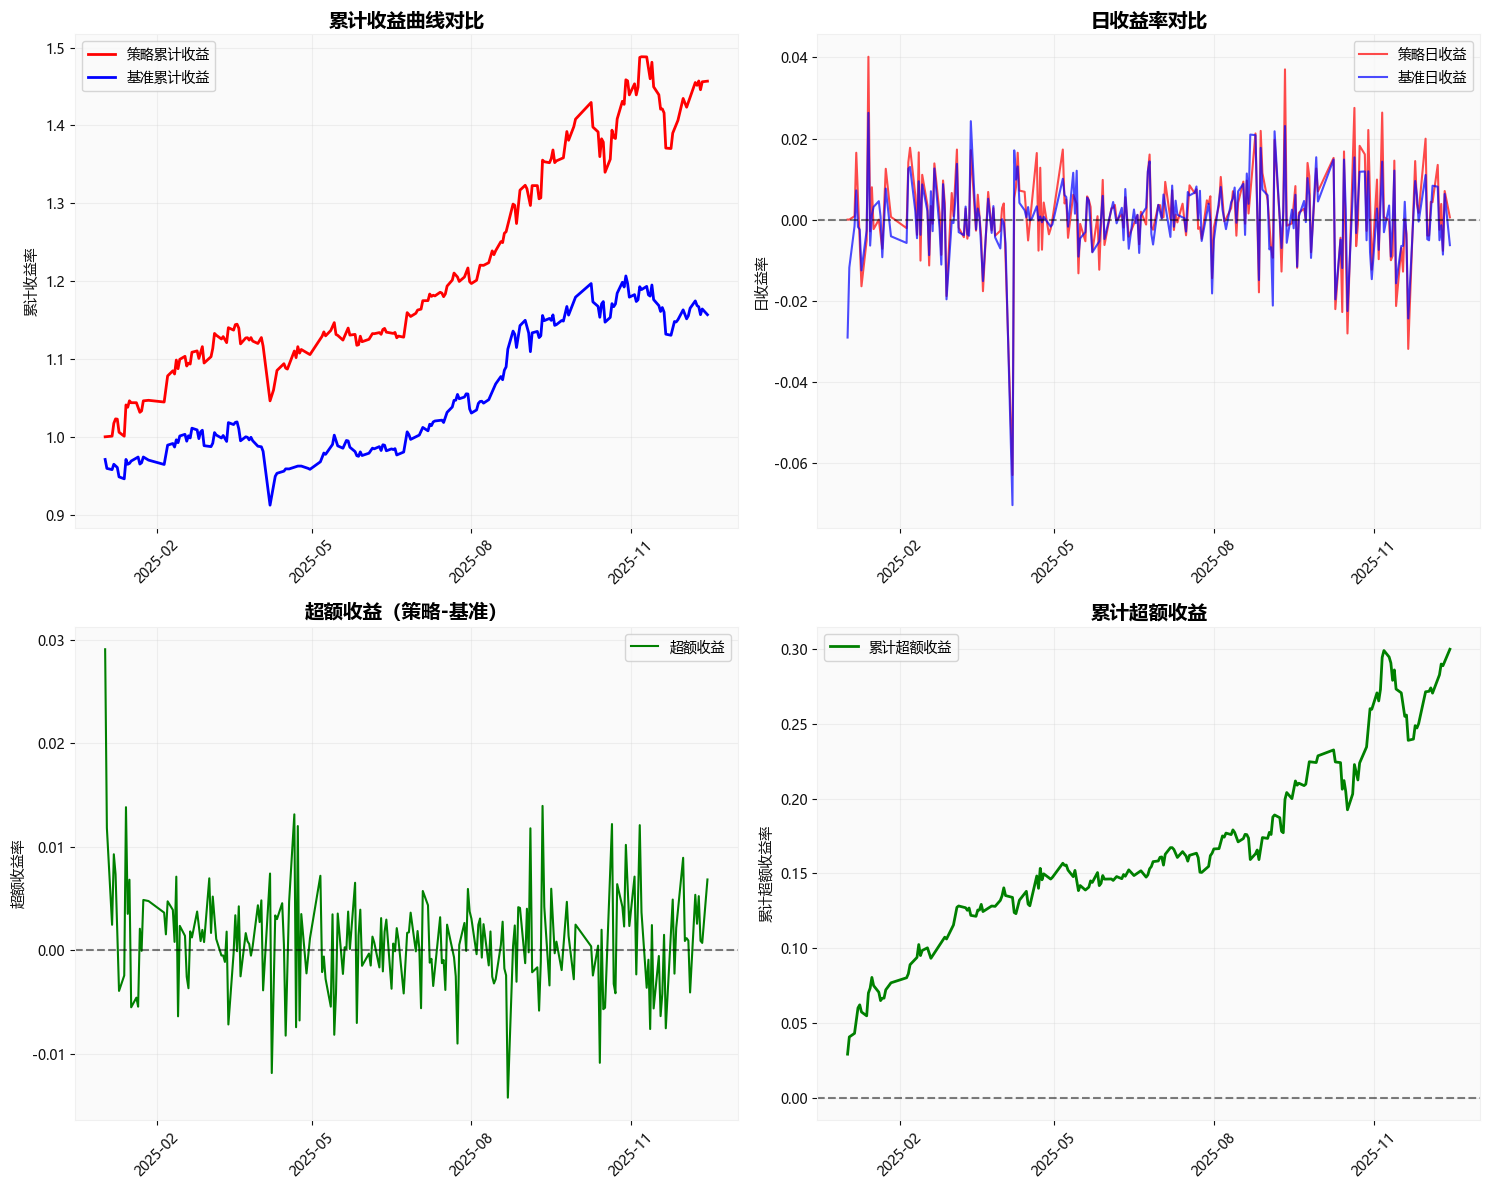

=== 回测结果分析 ===
策略总收益: 45.68%
基准总收益: 15.68%
超额收益: 29.99%

年化收益率: 19.34%
信息比率: 2.570
最大回撤: -3.43%
夏普比率不在当前数据中
日胜率不在当前数据中
日均换手率: 0.198


In [16]:
# 自定义收益曲线绘制
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 设置中文字体显示
plt.rcParams['font.family'] = ['Microsoft YaHei', 'SimHei', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 计算累计收益率
report_normal_df['cumulative_return'] = (1 + report_normal_df['return']).cumprod()
report_normal_df['cumulative_bench'] = (1 + report_normal_df['bench']).cumprod()

# 创建图形
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. 累计收益曲线对比
axes[0, 0].plot(report_normal_df.index, report_normal_df['cumulative_return'], 
                label='策略累计收益', color='red', linewidth=2)
axes[0, 0].plot(report_normal_df.index, report_normal_df['cumulative_bench'], 
                label='基准累计收益', color='blue', linewidth=2)
axes[0, 0].set_title('累计收益曲线对比', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('累计收益率')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. 日收益率对比
axes[0, 1].plot(report_normal_df.index, report_normal_df['return'], 
                label='策略日收益', color='red', alpha=0.7)
axes[0, 1].plot(report_normal_df.index, report_normal_df['bench'], 
                label='基准日收益', color='blue', alpha=0.7)
axes[0, 1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[0, 1].set_title('日收益率对比', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('日收益率')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. 超额收益
excess_return = report_normal_df['return'] - report_normal_df['bench']
axes[1, 0].plot(report_normal_df.index, excess_return, 
                label='超额收益', color='green', linewidth=1.5)
axes[1, 0].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1, 0].set_title('超额收益（策略-基准）', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('超额收益率')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. 累计超额收益
cumulative_excess = report_normal_df['cumulative_return'] - report_normal_df['cumulative_bench']
axes[1, 1].plot(report_normal_df.index, cumulative_excess, 
                label='累计超额收益', color='green', linewidth=2)
axes[1, 1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1, 1].set_title('累计超额收益', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('累计超额收益率')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 格式化所有子图的x轴
for ax in axes.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# 计算并显示关键指标
print("=== 回测结果分析 ===")
total_return = (report_normal_df['cumulative_return'].iloc[-1] - 1) * 100
bench_return = (report_normal_df['cumulative_bench'].iloc[-1] - 1) * 100
excess_return_total = total_return - bench_return

print(f"策略总收益: {total_return:.2f}%")
print(f"基准总收益: {bench_return:.2f}%") 
print(f"超额收益: {excess_return_total:.2f}%")

# 显示分析指标
print(f"\n年化收益率: {analysis_df.loc[('excess_return_with_cost', 'annualized_return'), 'risk']:.2%}")
print(f"信息比率: {analysis_df.loc[('excess_return_with_cost', 'information_ratio'), 'risk']:.3f}")
print(f"最大回撤: {analysis_df.loc[('excess_return_with_cost', 'max_drawdown'), 'risk']:.2%}")

# 检查夏普比率是否存在
if ('excess_return_with_cost', 'sharpe_ratio') in analysis_df.index:
    print(f"夏普比率: {analysis_df.loc[('excess_return_with_cost', 'sharpe_ratio'), 'risk']:.3f}")
else:
    print("夏普比率不在当前数据中")

# 检查日胜率是否存在
if ('excess_return_with_cost', 'win_ratio') in analysis_df.index:
    print(f"日胜率: {analysis_df.loc[('excess_return_with_cost', 'win_ratio'), 'risk']:.2%}")
else:
    print("日胜率不在当前数据中")

print(f"日均换手率: {report_normal_df['turnover'].mean():.3f}")

In [ ]:
# 计算夏普比率和日胜率的完整代码
import numpy as np

def calculate_sharpe_ratio(daily_returns, risk_free_rate=0.03):
    """计算夏普比率
    参考: https://www.quantopian.com/posts/sharpe-ratio
    Sharpe Ratio = (投资组合收益率 - 无风险利率) / 投资组合收益率标准差
    Information Ratio = (投资组合收益率 - 基准收益率) / 跟踪误差
    
    参数:
        daily_returns: 日收益率序列
        risk_free_rate: 年无风险利率，默认3%
    返回:
        年化夏普比率
    """
    # 将年无风险利率转换为日利率（假设252个交易日）
    daily_risk_free = risk_free_rate / 252
    
    # 计算超额收益
    excess_returns = daily_returns - daily_risk_free
    
    # 计算夏普比率（年化）
    if excess_returns.std() == 0:
        return 0
    
    sharpe_ratio = excess_returns.mean() / excess_returns.std() * np.sqrt(252)
    return sharpe_ratio

def calculate_win_ratio(daily_returns):
    """计算日胜率（盈利天数占比）
    参数:
        daily_returns: 日收益率序列
    返回:
        日胜率
    """
    win_days = (daily_returns > 0).sum()
    total_days = len(daily_returns)
    win_ratio = win_days / total_days if total_days > 0 else 0
    return win_ratio

# 从report_normal_df获取日收益率数据
daily_returns = report_normal_df['return'].dropna()

# 计算夏普比率（假设无风险利率为3%）
sharpe_ratio = calculate_sharpe_ratio(daily_returns, risk_free_rate=0.03)

# 计算日胜率
win_ratio = calculate_win_ratio(daily_returns)

# 显示结果
print(f"夏普比率: {sharpe_ratio:.3f}")
print(f"日胜率: {win_ratio:.2%}")

# 额外：显示详细的收益分布统计
print(f"\n=== 日收益详细统计 ===")
print(f"总交易日: {len(daily_returns)} 天")
print(f"平均日收益: {daily_returns.mean():.4f} ({daily_returns.mean()*100:.2f}%)")
print(f"日收益标准差: {daily_returns.std():.4f} ({daily_returns.std()*100:.2f}%)")
print(f"年化波动率: {daily_returns.std() * np.sqrt(252):.2%}")
print(f"盈利天数: {(daily_returns > 0).sum()} 天")
print(f"亏损天数: {(daily_returns < 0).sum()} 天")
print(f"持平天数: {(daily_returns == 0).sum()} 天")

# 显示收益分布的分位数
print(f"\n=== 收益分布分位数 ===")
quantiles = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
for q in quantiles:
    value = daily_returns.quantile(q)
    print(f"{q*100:2.0f}分位数: {value*100:6.2f}%")

# 计算不同持有期的胜率
print(f"\n=== 不同持有期胜率 ===")
for days in [1, 5, 10, 20]:
    if len(daily_returns) >= days:
        # 计算滚动收益
        rolling_returns = daily_returns.rolling(window=days).sum().dropna()
        rolling_win_ratio = (rolling_returns > 0).mean()
        print(f"{days}日持有期胜率: {rolling_win_ratio:.2%}")

夏普比率: 2.341
日胜率: 57.58%

=== 日收益详细统计 ===
总交易日: 231 天
平均日收益: 0.0017 (0.17%)
日收益标准差: 0.0106 (1.06%)
年化波动率: 16.87%
盈利天数: 133 天
亏损天数: 97 天
持平天数: 1 天

=== 收益分布分位数 ===
 1分位数:  -2.65%
 5分位数:  -1.30%
10分位数:  -0.89%
25分位数:  -0.28%
50分位数:   0.11%
75分位数:   0.67%
90分位数:   1.44%
95分位数:   1.73%
99分位数:   2.72%

=== 不同持有期胜率 ===
1日持有期胜率: 57.58%
5日持有期胜率: 72.25%
10日持有期胜率: 79.28%
20日持有期胜率: 80.19%


In [ ]:
# 字段含义说明（示例，不会被实际执行）
# account: 账户总价值（现金+持仓）
# return: 日收益率（相对前一日）
# total_turnover: 累计换手率
# turnover: 日换手率
# total_cost: 累计交易成本
# cost: 日交易成本
# value: 持仓市值
# cash: 现金余额
# bench: 沪深300当日收益率

# 展示最后5个交易日的收益情况
report_normal_df.tail()

In [ ]:
# 展示最后5个交易日的持仓情况
last_5_keys = list(positions.keys())[-5:]
last_5_positions = {key: positions[key] for key in last_5_keys}
last_5_positions

In [ ]:
# 📊 指标解释
# excess_return_with_cost: 扣除成本后的超额收益
#   在考虑交易成本后，相对于基准的超额收益表现
#
# mean: 0.000812
#   平均日超额收益
#   - 日平均超额收益 0.0812%
#   - 年化后约为 0.000812 × 252 = 20.5%
#
# std: 0.004876
#   超额收益标准差
#   - 日波动率 0.4876%
#   - 反映超额收益的波动性
#
# annualized_return: 0.193364
#   年化超额收益率
#   - 年化超额收益 19.34%
#   - 表现相当优秀
#
# information_ratio: 2.570406
#   信息比率
#   - 2.57 的信息比率
#   - 2.0 以上即被视为优秀
#   - 衡量单位主动风险带来的超额收益
#
# max_drawdown: -0.034252
#   最大回撤
#   - 最大回撤 -3.43%
#   - 相对较低，表明风险控制良好


analysis_df.tail()

In [ ]:
# 可视化持仓数据的完整代码
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def visualize_positions(positions_data, title="投资组合持仓分析"):
    """可视化持仓数据"""
    # 获取最新一天的持仓数据
    latest_date = max(positions_data.keys())
    latest_position = positions_data[latest_date]['position']
    
    # 提取股票数据（排除现金）
    stocks_data = []
    total_value = latest_position['now_account_value']
    cash_ratio = latest_position['cash'] / total_value
    
    for stock, info in latest_position.items():
        if stock not in ['cash', 'now_account_value'] and isinstance(info, dict):
            stocks_data.append({
                '股票代码': stock,
                '权重': info['weight'],
                '持仓天数': info['count_day'],
                '持仓金额': info['amount'] * info['price'],
                '价格': info['price']
            })
    
    df = pd.DataFrame(stocks_data)
    
    # 设置中文字体
    plt.rcParams['font.family'] = ['Microsoft YaHei', 'SimHei', 'sans-serif']
    plt.rcParams['axes.unicode_minus'] = False
    
    # 创建子图
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'{title} - {latest_date.strftime("%Y-%m-%d")}', fontsize=16, fontweight='bold')
    
    # 1. 权重分布饼图（前10大持仓）
    top_10 = df.nlargest(10, '权重')
    others_weight = df.nsmallest(len(df)-10, '权重')['权重'].sum()
    
    pie_data = list(top_10['权重']) + ([others_weight] if others_weight > 0 else [])
    pie_labels = list(top_10['股票代码']) + (['其他'] if others_weight > 0 else [])
    
    axes[0,0].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
    axes[0,0].set_title('持仓权重分布（前10大）')
    
    # 2. 持仓时间分布柱状图
    df_sorted = df.sort_values('持仓天数', ascending=True)
    axes[0,1].barh(range(len(df_sorted)), df_sorted['持仓天数'], color='skyblue')
    axes[0,1].set_yticks(range(len(df_sorted)))
    axes[0,1].set_yticklabels(df_sorted['股票代码'], fontsize=8)
    axes[0,1].set_xlabel('持仓天数')
    axes[0,1].set_title('股票持仓时间分布')
    axes[0,1].grid(axis='x', alpha=0.3)
    
    # 3. 权重vs持仓天数散点图
    scatter = axes[1,0].scatter(df['持仓天数'], df['权重'], 
                                 s=df['持仓金额']/10000, alpha=0.6, c=df['价格'], 
                                 cmap='viridis')
    axes[1,0].set_xlabel('持仓天数')
    axes[1,0].set_ylabel('权重')
    axes[1,0].set_title('权重 vs 持仓天数（气泡大小=持仓金额）')
    axes[1,0].grid(True, alpha=0.3)
    
    # 添加颜色条
    cbar = plt.colorbar(scatter, ax=axes[1,0])
    cbar.set_label('股票价格')
    
    # 4. 持仓结构统计
    stats_text = f"""持仓统计信息：
    总资产：{total_value:,.0f} 元
    现金比例：{cash_ratio:.1%}
    股票数量：{len(df)} 只
    平均权重：{df['权重'].mean():.2%}
    最大权重：{df['权重'].max():.2%}
    平均持仓天数：{df['持仓天数'].mean():.1f} 天
    最长持仓：{df['持仓天数'].max()} 天
    """
    
    axes[1,1].text(0.1, 0.9, stats_text, transform=axes[1,1].transAxes, 
                   fontsize=11, verticalalignment='top', fontfamily='monospace',
                   bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
    axes[1,1].set_xlim(0, 1)
    axes[1,1].set_ylim(0, 1)
    axes[1,1].axis('off')
    axes[1,1].set_title('投资组合统计')
    
    plt.tight_layout()
    plt.show()
    
    # 返回处理后的数据供进一步分析
    return df

# 使用可视化函数
position_df = visualize_positions(last_5_positions, "最后5日投资组合分析")

# 额外：创建权重排行榜
print("\n=== 前10大持仓明细 ===")
top_holdings = position_df.nlargest(10, '权重')[['股票代码', '权重', '持仓天数', '价格']]
top_holdings['权重'] = top_holdings['权重'].apply(lambda x: f"{x:.2%}")
print(top_holdings.to_string(index=False))

## analysis position

### report

In [ ]:
analysis_position.report_graph(report_normal_df)

### risk analysis

In [ ]:
analysis_position.risk_analysis_graph(analysis_df, report_normal_df)

## analysis model

In [ ]:
label_df = dataset.prepare("test", col_set="label")
label_df.columns = ["label"]

### score IC

In [ ]:
pred_label = pd.concat([label_df, pred_df], axis=1, sort=True).reindex(label_df.index)
analysis_position.score_ic_graph(pred_label)

### model performance

In [ ]:
analysis_model.model_performance_graph(pred_label)